In [ ]:
#PS5

In [ ]:
# Problem 1

In [2]:
#Imports
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# Constants
G = 6.67430e-11

In [52]:
# Leapfrog method
G = 6.67430e-11

"""
Function takes in positions and masses and returns acceleration, calculated by the formula for gravitational acceleration
Args:
    positions: list of N x-coordinates for the N-body system
    masses: list of N masses for the N-body system
Returns:
    List of accelerations for each planet
"""
# Gravitational acceleration
def gravitational_acceleration(positions, masses):
    
    n = len(masses)
    accelerations = np.zeros_like(positions)  # initialize the accelerations array
    
    for i in range(n):
        for j in range(n):
            if i != j:
                displacement = positions[j] - positions[i]
                distance_squared = np.sum(displacement ** 2)

                # Direction of the force is the unit displacement vector
                direction = displacement / np.sqrt(distance_squared)
                
                accelerations[i] += (G * masses[j] * direction)  / distance_squared
                
    return accelerations

"""
 Leapfrog is an integration technique calculates velocities and positions by calculating positions at fixed times 
 and veliocities at half way between points.
"""             
def leapfrog(positions, velocities, masses, dt):
    
    accelerations = gravitational_acceleration(positions, masses)
    
    velocities_half = velocities + 0.5 * dt * accelerations
    positions_new = positions + dt * velocities_half
    new_accelerations = gravitational_acceleration(positions_new, masses)
    velocities_new = velocities_half + 0.5 * dt * new_accelerations


    return positions_new, velocities_new
    
"""
Solves N-body problem using the leapfrog method.
"""
def leapfrog_solve(init_positions, init_velocities, masses, t_start, t_end, dt):
    nt = int(np.ceil((t_end - t_start) / dt))  # Number of steps
    n = len(masses)
    times = np.zeros(nt+1)
    positions = np.zeros((nt+1, n, 2)) 
    velocities = np.zeros_like(positions)

    # Set initial conditions
    times[0] = t_start
    positions[0] = init_positions
    velocities[0] = init_velocities

    for i in range(nt):
        times[i + 1] = times[i] + dt
        positions[i + 1], velocities[i + 1] = leapfrog(positions[i], velocities[i], masses, dt)

    return times, positions, velocities

# Initial conditions and parameters
masses = np.array([1.989e30, 5.972e24])  # Masses for the Sun and Earth
init_positions = np.array([[0, 0], [1.496e11, 0]])  
init_velocities = np.array([[0, 0], [0, 29780]])  

t_start = 0
t_end = 1.5678e8 #3.154e7 5 years in seconds
dt = 1000  # time step 

times, positions, velocities = leapfrog_solve(init_positions, init_velocities, masses, t_start, t_end, dt)

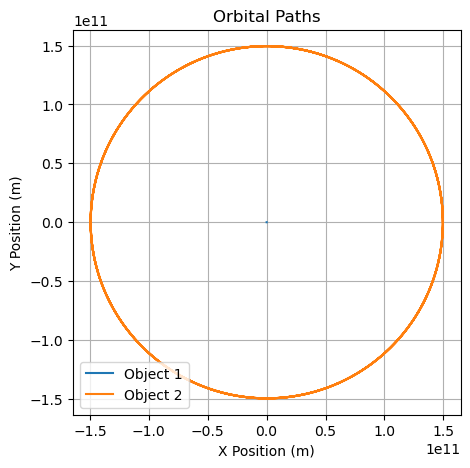

In [53]:
"""
Plotting the x and y coordinates of object 1 and 2, to ensure the simulation is accurate. 
We can see that object 1, the sun, stays in the middle, as the Earth makes a circular orbit around the sun.  
""" 
# Extracting X and Y coordinates
x_positions = positions[:, :, 0]  
y_positions = positions[:, :, 1] 

# Plotting
plt.figure(figsize=(5, 5))

for i in range(len(masses)):
    plt.plot(x_positions[:, i], y_positions[:, i], label=f'Object {i+1}')

plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Orbital Paths')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()


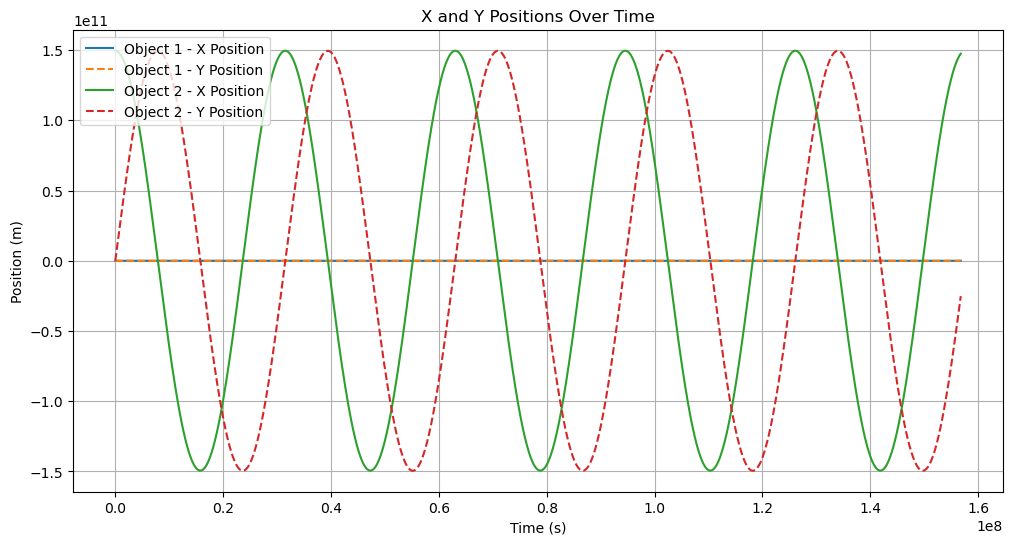

In [38]:
"""
Plotting the x and y position of each object over 5 orbital periods, which is 5 years.

"""
# Extracting X and Y coordinates for all objects at all times
x_positions = positions[:, :, 0] 
y_positions = positions[:, :, 1] 

plt.figure(figsize=(12, 6))

# Creating lines for each object's X and Y positions over time
for i in range(len(masses)):  
    plt.plot(times, x_positions[:, i], label=f'Object {i+1} - X Position', linestyle='-', marker='')
    plt.plot(times, y_positions[:, i], label=f'Object {i+1} - Y Position', linestyle='--', marker='')

plt.title('X and Y Positions Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.grid(True)
plt.legend()  

plt.show()



In [55]:
"""
Monitoring the total energy and radius of the system
Functions calculate the energy of the system and the radius for each time step.
It compares the energy and radius to the previous values to calculate the energy and radius change between each orbit.
Then it determines whether changes are within the confines of the problem;
max energy and radius change cannot exceed a few tenths of a percent per orbit.
""" 
# Calculates the number of time steps, and rounds up to the nearest whole number
nt = int(np.ceil((t_end - t_start) / dt))

"""
# Function calculates the total energy of the system, using the formula for kinetic energy, and gravitational potential energy
"""
def calculate_energy(positions, velocities, masses):
    kinetic_energy = 0.5 * np.sum(masses * np.sum(velocities**2, axis=-1))  # KE = 0.5*m*v^2
    potential_energy = 0 

    for i in range(len(masses)):
        for j in range(i+1, len(masses)):
            distance = distance = np.linalg.norm(positions[i] - positions[j])
            potential_energy -= (G * masses[i] * masses[j]) / distance  # U = -G*m1*m2/r
            
    total_energy = kinetic_energy + potential_energy
    return kinetic_energy, potential_energy, total_energy

# Variables to store maximum changes
max_radius_change = 0
max_energy_change = 0

# Previous values for comparison
previous_radius = None
previous_energy = None

# Running simulation
for i in range(nt):
    current_positions = positions[i]
    current_velocities = velocities[i]

    # Calculate orbital radius
    orbital_radius = np.linalg.norm(current_positions[1] - current_positions[0])
    
    # Calculate energy
    kinetic, potential, total_energy = calculate_energy(current_positions, current_velocities, masses)

    if previous_radius is not None:
        radius_change = np.abs(orbital_radius - previous_radius) / previous_radius
        max_radius_change = max(max_radius_change, radius_change)

    if previous_energy is not None:
        energy_change = np.abs(total_energy - previous_energy) / previous_energy
        max_energy_change = max(max_energy_change, energy_change)

    previous_radius = orbital_radius
    previous_energy = total_energy

# Check if radius change and energy change are within a few tenths of a percentage
if max_radius_change > 0.002 or max_energy_change > 0.002: 
    print(f"Max radius change: {max_radius_change*100:.2f}%, max energy change: {max_energy_change*100:.2f}%")
    print("Simulation is not within bounds.")
else:
    print("Simulation is stable within set thresholds.")


Simulation is stable within set thresholds.


In [44]:
"""
Confirming that the analysis above is accurate.
Printing the values of energy and radius after each orbital is completed, and checking that there is no major change
"""

one_orbit_time = (t_end - t_start) / 5
next_orbit_completion_time = one_orbit_time 

for i in range(nt):
    current_time = t_start + i * dt  
    current_positions = positions[i]
    current_velocities = velocities[i]

    # Calculate orbital radius
    orbital_radius = np.linalg.norm(current_positions[1] - current_positions[0])

    # Calculate energy
    kinetic, potential, total_energy = calculate_energy(current_positions, current_velocities, masses)

    # Store max changes if they are higher than the previous ones
    if previous_radius is not None:
        radius_change = np.abs(orbital_radius - previous_radius) / previous_radius
        max_radius_change = max(max_radius_change, radius_change)

    if previous_energy is not None:
        energy_change = np.abs(total_energy - previous_energy) / previous_energy
        max_energy_change = max(max_energy_change, energy_change)

    if current_time >= next_orbit_completion_time:
        print(f"After one orbit (Year {int(current_time/one_orbit_time):d}):")
        print(f" - Orbital radius: {orbital_radius:.2f} m")
        print(f" - Total energy: {total_energy:.2f} J")
        print(f" - Max radius change since last orbit: {max_radius_change*100:.2f}%")
        print(f" - Max energy change since last orbit: {max_energy_change*100:.2f}%\n")
        
        next_orbit_completion_time += one_orbit_time

        # Reset max changes for the next orbit
        max_radius_change = 0
        max_energy_change = 0

    previous_radius = orbital_radius
    previous_energy = total_energy

After one orbit (Year 1):
 - Orbital radius: 149537974118.57 m
 - Total energy: -2651295215349033092589395772440576.00 J
 - Max radius change since last orbit: 0.00%
 - Max energy change since last orbit: 0.00%

After one orbit (Year 2):
 - Orbital radius: 149437572176.06 m
 - Total energy: -2651295215384449111828661201272832.00 J
 - Max radius change since last orbit: 0.00%
 - Max energy change since last orbit: 0.00%

After one orbit (Year 3):
 - Orbital radius: 149437722293.47 m
 - Total energy: -2651295215384423171094807547215872.00 J
 - Max radius change since last orbit: 0.00%
 - Max energy change since last orbit: 0.00%

After one orbit (Year 4):
 - Orbital radius: 149538216525.40 m
 - Total energy: -2651295215348980634660936160903168.00 J
 - Max radius change since last orbit: 0.00%
 - Max energy change since last orbit: 0.00%



In [47]:
def leapfrog_solver(init_positions, init_velocities, masses, t_start, t_end, dt):
    """
    Solves N-body problem using the leapfrog method.
    """
    nt = int(np.ceil((t_end - t_start) / dt))  # Number of steps

    n = len(masses)  
    times = np.zeros(nt+1)
    
    positions = np.zeros((nt+1, n, 2))  
    velocities = np.zeros_like(positions)

    times[0] = t_start
    positions[0] = init_positions
    velocities[0] = init_velocities

    for i in range(nt):
        times[i + 1] = times[i] + dt
        positions[i + 1], velocities[i + 1] = leapfrog(positions[i], velocities[i], masses, dt)

    return times, positions, velocities


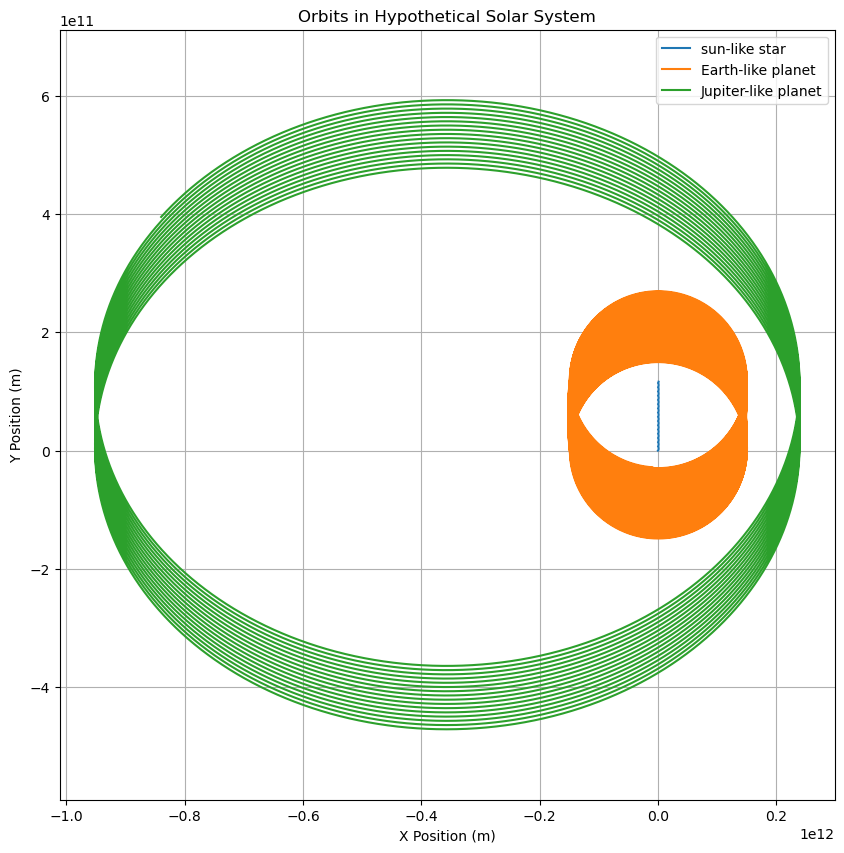

In [58]:
# Problem 2
"""
Use the leapfrog solver to integrate the n body system of a Sun like object, Earth like object, and Jupiter like object
"""

# Constants
G = 6.67430e-11  
AU = 1.496e11  # Astronomical Unit in meters

# System of three bodies: Sun-like, Earth-like, and Jupiter-like
masses = np.array([1.989e30, 5.972e24, 1.898e27]) 
init_positions = np.array([[0, 0], [AU, 0], [4 * AU * (1 - 0.6), 0]])  #Jupiter at pericenter

# Calculate velocity at pericenter for the Jupiter-like planet using the given formula.
e = 0.6  # Eccentricity
a_jupiter = 4 * AU  # Semi-major axis for the Jupiter-like planet
v_jupiter_pericenter = np.sqrt(G * masses[0] * (1 + e) / (a_jupiter * (1 - e)))

init_velocities = np.array([[0, 0], [0, np.sqrt(G * masses[0] / AU)], [0, v_jupiter_pericenter]])

# Time settings
t_start = 0
t_end = 3.154e7 * 1.3e2  # 130 years 
dt = 1000  # Time step in seconds


times, positions, velocities = leapfrog_solver(init_positions, init_velocities, masses, t_start, t_end, dt)

# Plotting the results
x_star, y_star = positions[:, 0, 0], positions[:, 0, 1]
x_earth, y_earth = positions[:, 1, 0], positions[:, 1, 1]
x_jupiter, y_jupiter = positions[:, 2, 0], positions[:, 2, 1]

plt.figure(figsize=(10, 10))
plt.plot(x_star, y_star, label='sun-like star')
plt.plot(x_earth, y_earth, label='Earth-like planet')
plt.plot(x_jupiter, y_jupiter, label='Jupiter-like planet')
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')
plt.title('Orbits in Hypothetical Solar System')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


In [ ]:
# The sun-like star and Earth-like planet have stable orbits.
# Jupiter-like planet has an eccentric orbit around the star.
# The system orbits around the center of mass, and have stable orbits 
# The gravitational attractions create pertubations within the system 

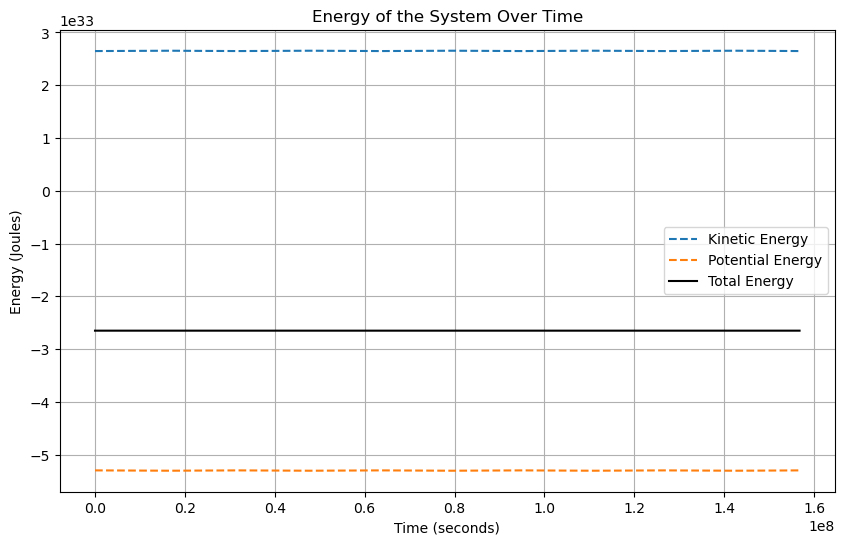

In [56]:
"""
Plotting the evolution of energy, to confirm that it is constant over time. 
"""

kinetic_energies = np.zeros(nt+1)
potential_energies = np.zeros(nt+1)
total_energies = np.zeros(nt+1)

# Calculate energy at each step and store it
for i in range(nt+1):
    current_positions = positions[i]
    current_velocities = velocities[i]
    
    kinetic, potential, total = calculate_energy(current_positions, current_velocities, masses)
    kinetic_energies[i] = kinetic
    potential_energies[i] = potential
    total_energies[i] = total

# Plotting the energy over time
times_array = np.arange(t_start, t_end + dt, dt) 

plt.figure(figsize=(10, 6))
plt.plot(times_array, kinetic_energies, label='Kinetic Energy', linestyle='--')
plt.plot(times_array, potential_energies, label='Potential Energy', linestyle='--')
plt.plot(times_array, total_energies, label='Total Energy', color='black')
plt.xlabel('Time (seconds)')
plt.ylabel('Energy (Joules)')
plt.title('Energy of the System Over Time')
plt.legend()
plt.grid(True)
plt.show()


"""
Plot shows that total energy is constant over time, showing that energy was conserved.
"""